In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical  # one-hot encoding

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [8]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


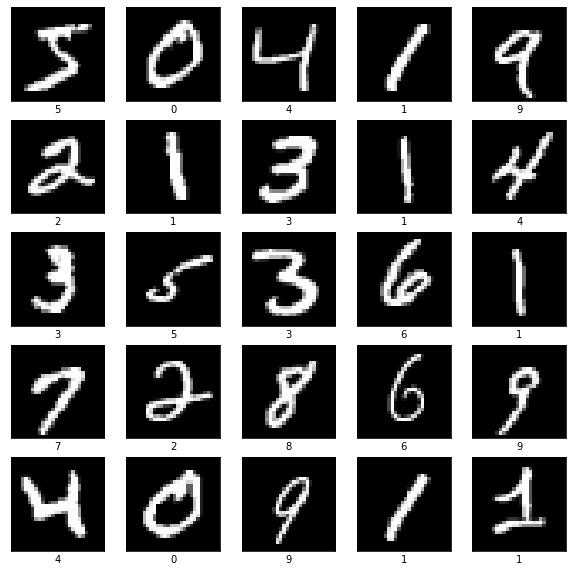

In [9]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [10]:
# one hot encoding

t_train = to_categorical(t_train, 10)

t_test = to_categorical(t_test, 10)

In [11]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), 
                 kernel_size=3, filters=32, 
                 strides=(1,1), activation='relu', padding='SAME'))

model.add(MaxPool2D(pool_size=(2,2), padding='SAME'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [12]:
# model compile
# one hot encoding 방식이기 때문에, loss=categorical_crossentropy 정의

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
start_time = datetime.now()

hist = model.fit(x_train.reshape(-1,28,28,1), t_train, 
                 batch_size=50, epochs=50, validation_split=0.2)

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
960/960 [==============================] - 36s 5ms/step - loss: 0.2770 - accuracy: 0.9227 - val_loss: 0.1207 - val_accuracy: 0.9666
Epoch 2/50
960/960 [==============================] - 5s 5ms/step - loss: 0.1032 - accuracy: 0.9706 - val_loss: 0.0900 - val_accuracy: 0.9750
Epoch 3/50
960/960 [==============================] - 5s 5ms/step - loss: 0.0749 - accuracy: 0.9782 - val_loss: 0.0814 - val_accuracy: 0.9762
Epoch 4/50
960/960 [==============================] - 5s 5ms/step - loss: 0.0604 - accuracy: 0.9814 - val_loss: 0.0706 - val_accuracy: 0.9803
Epoch 5/50
960/960 [==============================] - 5s 5ms/step - loss: 0.0509 - accuracy: 0.9850 - val_loss: 0.0674 - val_accuracy: 0.9791
Epoch 6/50
960/960 [==============================] - 5s 5ms/step - loss: 0.0446 - accuracy: 0.9865 - val_loss: 0.0696 - val_accuracy: 0.9787
Epoch 7/50
960/960 [==============================] - 5s 5ms/step - loss: 0.0383 - accuracy: 0.9885 - val_loss: 0.0711 - val_accuracy: 0.9806
Epoch

In [14]:
model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1081 - accuracy: 0.9827


[0.10812240839004517, 0.982699990272522]

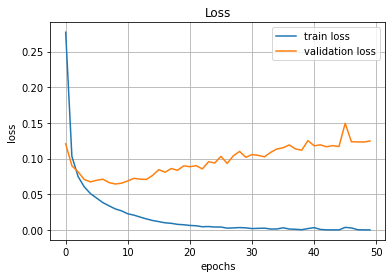

In [15]:
plt.title('Loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

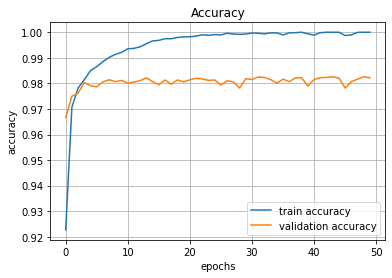

In [16]:
plt.title('Accuracy')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

In [17]:
rand_idx = np.random.randint(len(x_test))

print(rand_idx)

predicted_val = model.predict(x_test[rand_idx].reshape(-1,28,28,1))

print(type(predicted_val), predicted_val.shape)

print(predicted_val)

print(np.argmax(predicted_val), t_test[rand_idx])

891
<class 'numpy.ndarray'> (1, 10)
[[1.89882075e-27 4.84834846e-11 1.00000000e+00 2.81559674e-17
  0.00000000e+00 9.59995959e-26 1.03758224e-20 3.60946180e-36
  2.25638489e-20 1.11731789e-23]]
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
